# Explore Dataset Directory Structure

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, subdirs, _ in os.walk('/kaggle/input/intel-image-classification'):
    print(dirname)

/kaggle/input/intel-image-classification
/kaggle/input/intel-image-classification/seg_train
/kaggle/input/intel-image-classification/seg_train/seg_train
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain
/kaggle/input/intel-image-classification/seg_train/seg_train/street
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings
/kaggle/input/intel-image-classification/seg_train/seg_train/sea
/kaggle/input/intel-image-classification/seg_train/seg_train/forest
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier
/kaggle/input/intel-image-classification/seg_pred
/kaggle/input/intel-image-classification/seg_pred/seg_pred
/kaggle/input/intel-image-classification/seg_test
/kaggle/input/intel-image-classification/seg_test/seg_test
/kaggle/input/intel-image-classification/seg_test/seg_test/mountain
/kaggle/input/intel-image-classification/seg_test/seg_test/street
/kaggle/input/intel-image-classification/seg_test/seg_test/buildings
/kaggle/input/i

#### The dataset consists of natural scene images across 6 categories:

**Folder hierarchy:**

    /kaggle/input/intel-image-classification
    │
    ├── seg_train/ → Training images
    │ └── seg_train/
    │ ├── mountain/
    │ ├── street/
    │ ├── buildings/
    │ ├── sea/
    │ ├── forest/
    │ └── glacier/
    │
    ├── seg_test/ → Testing images
    │ └── seg_test/
    │ ├── mountain/
    │ ├── street/
    │ ├── buildings/
    │ ├── sea/
    │ ├── forest/
    │ └── glacier/
    │
    └── seg_pred/ → Prediction images (unlabeled)
    └── seg_pred/

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

import tensorflow as tf
print("GPUs available:", tf.config.list_physical_devices('GPU'))

from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-09-15 18:20:59.897220: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757960459.921385    1421 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757960459.928680    1421 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [3]:
train_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
test_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test'

# List subdirectories (classes) in the training directory
train_subdirs = os.listdir(train_dir)
print("Training subdirectories (classes):")
for subdir in train_subdirs:
    print(subdir)

# List subdirectories (classes) in the test directory
test_subdirs = os.listdir(test_dir)
print("\nTesting subdirectories (classes):")
for subdir in test_subdirs:
    print(subdir)

Training subdirectories (classes):
mountain
street
buildings
sea
forest
glacier

Testing subdirectories (classes):
mountain
street
buildings
sea
forest
glacier


In [4]:
train_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
print(os.listdir(train_dir))

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']


In [5]:
class_folder_forest = 'forest'

# Get list of images in chosen class folder
images_list_forest = os.listdir(os.path.join(train_dir, class_folder_forest))
print("First image file:", images_list_forest[0])

First image file: 7981.jpg


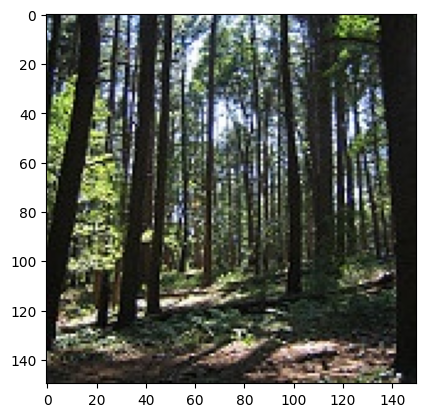

In [6]:
# Full path to the first image
image_path_forest = os.path.join(train_dir, class_folder_forest, images_list_forest[0])

image_forest1 = imread(image_path_forest)
plt.imshow(image_forest1)

In [7]:
image_forest1.shape

(150, 150, 3)

In [8]:
class_folder_sea = 'sea'

images_list_sea = os.listdir(os.path.join(train_dir, class_folder_sea))
print("First image file:", images_list_sea[0])

First image file: 19812.jpg


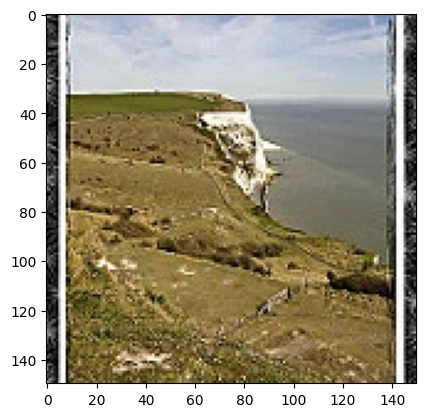

In [9]:
image_path_sea = os.path.join(train_dir, class_folder_sea, images_list_sea[0])

image_sea1 = imread(image_path_sea)
plt.imshow(image_sea1)

In [10]:
image_sea1.shape

(150, 150, 3)

### **Number of Images**

In [11]:
class_folder_mountain = 'mountain'
class_folder_glacier = 'glacier'
class_folder_buildings = 'buildings'
class_folder_street = 'street'

len_forest = len(images_list_forest)
len_sea = len(images_list_sea)
len_street = len(os.listdir(os.path.join(train_dir, class_folder_street)))
len_buildings = len(os.listdir(os.path.join(train_dir, class_folder_buildings)))
len_glacier = len(os.listdir(os.path.join(train_dir, class_folder_glacier)))
len_mountain = len(os.listdir(os.path.join(train_dir, class_folder_mountain)))

In [12]:
print("Glacier: ",len_glacier)
print("Sea: ",len_sea)
print("Mountain: ",len_mountain)
print("buildings: ",len_buildings)
print("Forest: ",len_forest)
print("Street: ",len_street)


Glacier:  2404
Sea:  2274
Mountain:  2512
buildings:  2191
Forest:  2271
Street:  2382


### Analyzing Image Dimensions in the "forest" Folder

In [13]:
dim1 = []
dim2 = []
for image_filename in os.listdir(os.path.join(test_dir, 'forest')):
    img = imread(os.path.join(test_dir, 'forest', image_filename))
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


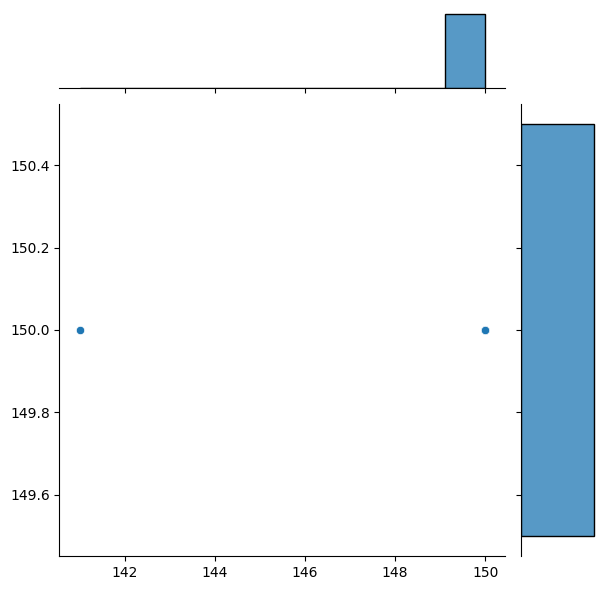

In [14]:
sns.jointplot(x=dim1, y=dim2, kind="scatter")
plt.show()

#### dataset seems to be preprocessed to a fixed size (150×150).

# Preparing the Data for the model
### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us.

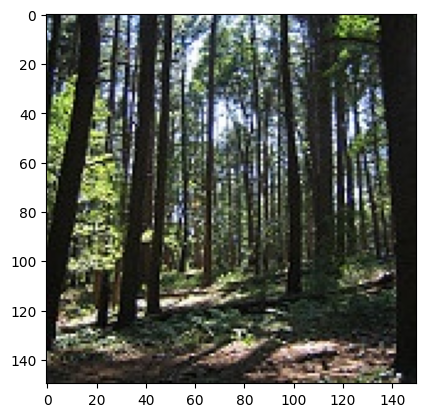

In [15]:
plt.imshow(image_forest1)

In [16]:
image_forest1.max()

255

In [17]:
image_forest1.min()

0

In [18]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255, 
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True, 
                               fill_mode='nearest'
                              )

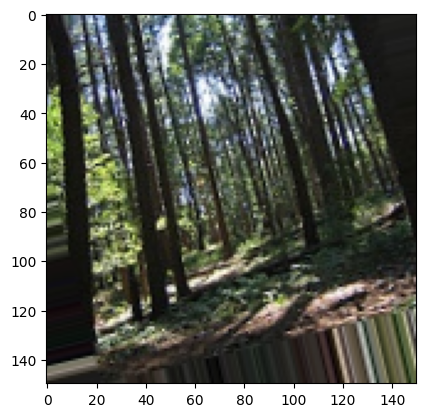

In [19]:
plt.imshow(image_gen.random_transform(image_forest1))

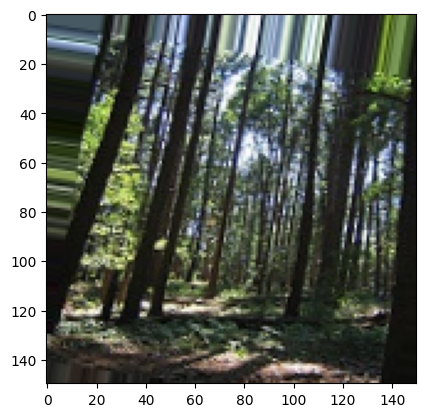

In [20]:
plt.imshow(image_gen.random_transform(image_forest1))

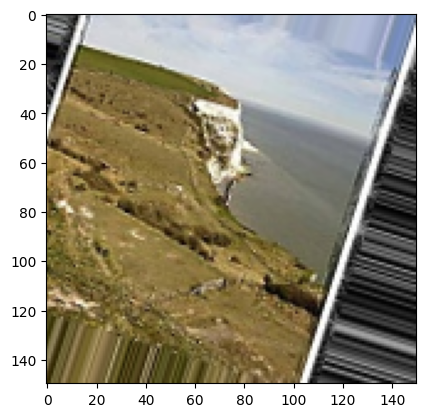

In [21]:
plt.imshow(image_gen.random_transform(image_sea1))

## Generated Manipulated iamge from a directory

In [22]:
image_gen.flow_from_directory(train_dir)

Found 14034 images belonging to 6 classes.


In [23]:
image_gen.flow_from_directory(test_dir)

Found 3000 images belonging to 6 classes.


#### `flow_from_directory`

- Loads images from a directory and creates a **data generator** for training.  
- Automatically labels images based on **folder names**.  
- Can apply **rescaling, augmentation, and batching**.


# Creating the Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization

In [26]:
image_shape = (150, 150, 3)
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(256)) 
model.add(Activation('relu')) 

model.add(Dropout(0.5)) # Output layer – 6 classes → softmax 
model.add(Dense(6,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1757960661.875942    1421 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1757960661.876614    1421 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [27]:
# Compile
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,564,998 (36.49 MB)

 Trainable params: 9,564,998 (36.49 MB)

 Non-trainable params: 0 (0.00 B)

# Early Stopping

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

#### `val_accuracy` vs `val_loss`

- **`val_accuracy`**  
  - Measures the proportion of correct predictions on the validation set.  
  - Best for **classification tasks** where the goal is to maximize correct predictions.  
  - Stopping on `val_accuracy` prevents overfitting once accuracy plateaus.

- **`val_loss`**  
  - Measures the error (loss) on the validation set.  
  - Useful for **regression tasks** or **imbalanced datasets**.  
  - Can catch subtle improvements even if accuracy doesn’t change.

#### `restore_best_weights=True`

- Restores the model to the **best weights** after EarlyStopping.  
- Prevents keeping weights from later epochs that may have **overfitted**.  

# Training the Model

In [31]:
train_generator = image_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,          
    color_mode='rgb',       # preserve colors
    class_mode="categorical"
)

Found 14034 images belonging to 6 classes.


In [32]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [33]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,             
    color_mode='rgb',           # keep color info
    class_mode="categorical",
    shuffle=False             
)

Found 3000 images belonging to 6 classes.


In [34]:
train_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
results = model.fit(
    train_generator,
    epochs=40,
    validation_data=test_generator,
    callbacks=[early_stop]
)

Epoch 1/40


I0000 00:00:1757960682.722454    1487 service.cc:148] XLA service 0x7f0b90005f90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757960682.722505    1487 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1757960682.722509    1487 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1757960682.974298    1487 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/439 ━━━━━━━━━━━━━━━━━━━━ 43:27 6s/step - accuracy: 0.0938 - loss: 1.8340

I0000 00:00:1757960686.297887    1487 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


439/439 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.4811 - loss: 1.2883 - val_accuracy: 0.6803 - val_loss: 0.8341
Epoch 2/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 86s 197ms/step - accuracy: 0.6736 - loss: 0.8824 - val_accuracy: 0.7717 - val_loss: 0.6486
Epoch 3/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 88s 199ms/step - accuracy: 0.7251 - loss: 0.7645 - val_accuracy: 0.7917 - val_loss: 0.5937
Epoch 4/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 85s 193ms/step - accuracy: 0.7580 - loss: 0.6709 - val_accuracy: 0.8153 - val_loss: 0.5372
Epoch 5/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 84s 192ms/step - accuracy: 0.7782 - loss: 0.6223 - val_accuracy: 0.8113 - val_loss: 0.5542
Epoch 6/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 84s 192ms/step - accuracy: 0.7870 - loss: 0.6029 - val_accuracy: 0.8267 - val_loss: 0.5120
Epoch 7/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 87s 198ms/step - accuracy: 0.8040 - loss: 0.5624 - val_accuracy: 0.8407 - val_loss: 0.4442
Epoch 8/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 90s 204ms/step - accuracy: 0.8089 - loss: 0.5574 - val

In [37]:
from tensorflow.keras.models import load_model
model.save('/kaggle/working/intel_image_classifier.h5')

# Evaluting the Model

In [38]:
losses = pd.DataFrame(model.history.history)

In [39]:

losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.565983,1.104176,0.680333,0.834053
1,0.688400,0.839631,0.771667,0.648552
2,0.731224,0.741449,0.791667,0.593731
3,0.762149,0.668304,0.815333,0.537158
4,0.778039,0.621047,0.811333,0.554245


<Axes: >

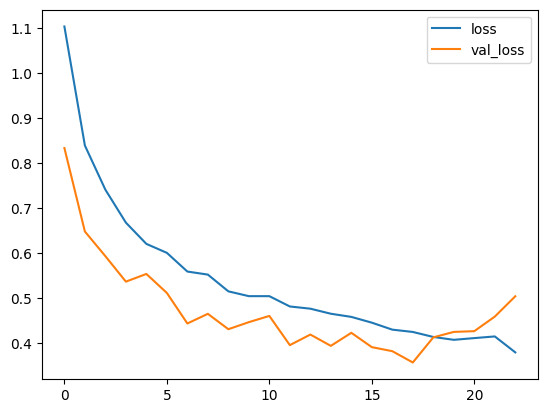

In [40]:
losses[['loss','val_loss']].plot()

In [41]:
model.metrics_names

['loss', 'compile_metrics']

In [42]:
loss, accuracy = model.evaluate(test_generator)
print("Loss:", loss)
print("Accuracy:", accuracy)

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8838 - loss: 0.3449
Loss: 0.35751909017562866
Accuracy: 0.878333330154419


- **Loss:** 0.358  
- **Accuracy:** 87.83%  

#### Hence,  The model performs well on the test set, showing good generalization for Intel image classification.

In [55]:
# Predict probabilities for all test images
pred_probabilities = model.predict(test_generator) 

# Convert probabilities to predicted class indices (0-5 for 6 classes)
predictions = np.argmax(pred_probabilities, axis=1)

# Get true labels
true_labels = test_generator.classes

# Print first 10 predictions vs true labels
print("Predicted classes:", predictions[:10])
print("True classes:     ", true_labels[:10])

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step
Predicted classes: [0 0 0 0 4 3 0 0 0 0]
True classes:      [0 0 0 0 0 0 0 0 0 0]


Shows that the model correctly predicted most images, but misclassified a few.

## `np.argmax` for Predictions

- `np.argmax` returns the **index of the maximum value** along a specified axis.  
- In image classification, the model outputs **probabilities for each class** (softmax output).  
- Using `np.argmax(pred_probabilities, axis=1)` gives the **predicted class** for each image by selecting the class with the **highest probability**.

**Example:**

probs = np.array([[0.1, 0.7, 0.2],
                  [0.8, 0.1, 0.1]])
preds = np.argmax(probs, axis=1)
print(preds)  # Output: [1, 0]

In [56]:
class_counts = pd.Series(test_generator.classes).value_counts()
print(class_counts)

2    553
3    525
4    510
5    501
1    474
0    437
Name: count, dtype: int64


In [57]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n")
print(classification_report(true_labels, predictions, target_names=test_generator.class_indices.keys()))


Classification Report:

              precision    recall  f1-score   support

   buildings       0.88      0.87      0.87       437
      forest       0.97      0.97      0.97       474
     glacier       0.82      0.86      0.84       553
    mountain       0.86      0.80      0.83       525
         sea       0.88      0.86      0.87       510
      street       0.88      0.92      0.90       501

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



## Classification Report

| Class      | Precision | Recall | F1-score | Support |
|------------|----------|--------|----------|---------|
| buildings  | 0.88     | 0.87   | 0.87     | 437     |
| forest     | 0.97     | 0.97   | 0.97     | 474     |
| glacier    | 0.82     | 0.86   | 0.84     | 553     |
| mountain   | 0.86     | 0.80   | 0.83     | 525     |
| sea        | 0.88     | 0.86   | 0.87     | 510     |
| street     | 0.88     | 0.92   | 0.90     | 501     |
| **Accuracy** | -      | -      | 0.88     | 3000    |
| **Macro Avg** | 0.88  | 0.88   | 0.88     | 3000    |

💡 The model shows **good precision, recall, and F1-scores** across all classes, with overall accuracy of 88%.


In [52]:
cm = confusion_matrix(true_labels, predictions)
print("\nConfusion Matrix:\n")
print(cm)


Confusion Matrix:

[[381   1   1   2   9  43]
 [  3 461   0   5   1   4]
 [  3   6 473  44  22   5]
 [  3   2  70 421  26   3]
 [ 11   4  30  16 440   9]
 [ 33   2   0   3   4 459]]


## Confusion Matrix

| True \ Pred | buildings | forest | glacier | mountain | sea | street |
|-------------|-----------|--------|---------|----------|-----|--------|
| **buildings**  | 381       | 1      | 1       | 2        | 9   | 43     |
| **forest**     | 3         | 461    | 0       | 5        | 1   | 4      |
| **glacier**    | 3         | 6      | 473     | 44       | 22  | 5      |
| **mountain**   | 3         | 2      | 70      | 421      | 26  | 3      |
| **sea**        | 11        | 4      | 30      | 16       | 440 | 9      |
| **street**     | 33        | 2      | 0       | 3        | 4   | 459    |

💡 Diagonal values show **correct predictions**, off-diagonal values show **misclassifications**.


<Axes: >

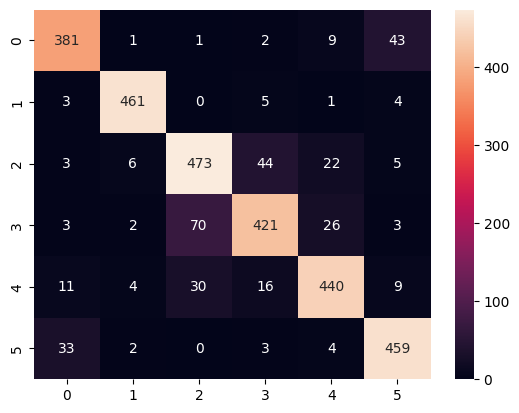

In [53]:
sns.heatmap(cm, annot=True, fmt='d')   # 'd' → integer

# Predicting on an image